In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import obspy
import seaborn as sns


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
heart = pd.read_excel("/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Summary_Pub_Deidentified.xlsx")
df = heart.copy().fillna(0)

In [3]:
df.drop(["Mitral valve Peak velocity (m/sec)",
         "Mitral valve Mean gradient(mmHg)", 
         "Echo available",
        "Date of collection",
        "Date of echo"], 
        inplace = True, axis = 1)
df.drop(df.tail(1).index,inplace=True)

In [4]:
idx_MS = np.where((df['Moderate or greater MS'] == 1.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_MS = df.loc[idx_MS]

In [5]:
idx_MR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 1.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_MR = df.loc[idx_MR]

In [6]:
idx_AR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 1.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_AR = df.loc[idx_AR]

In [7]:
idx_AS = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 1.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_AS = df.loc[idx_AS]

In [9]:
diseased_MS.describe().T

,count,mean,std,min,25%,50%,75%,max
Sampling rate(Hz),3.0,256.000000,0.000000,256.0,256.00,256.0,256.00,256.0
Age,3.0,43.666667,10.692677,32.0,39.00,46.0,49.50,53.0
Height (cm),3.0,161.666667,9.073772,155.0,156.50,158.0,165.00,172.0
Weight (kg),3.0,63.333333,6.658328,59.0,59.50,60.0,65.50,71.0
History of MI,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
History of CABG,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
History of PCI,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
AOD (mm),3.0,28.000000,1.732051,27.0,27.00,27.0,28.50,30.0
LAD (mm),3.0,49.000000,5.567764,44.0,46.00,48.0,51.50,55.0
LVDs,3.0,32.333333,6.806859,27.0,28.50,30.0,35.00,40.0


In [10]:
diseased_MR.describe().T

,count,mean,std,min,25%,50%,75%,max
Sampling rate(Hz),13.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Age,13.0,58.846154,12.026680,29.0,54.0,59.0,66.0,74.0
Height (cm),13.0,165.153846,8.961456,150.0,163.0,167.0,170.0,180.0
Weight (kg),13.0,69.692308,7.817018,57.0,65.0,68.5,74.0,84.0
History of MI,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
History of CABG,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
History of PCI,13.0,0.076923,0.277350,0.0,0.0,0.0,0.0,1.0
AOD (mm),13.0,31.076923,3.684688,25.0,28.0,32.0,33.0,37.0
LAD (mm),13.0,46.923077,5.574668,40.0,41.0,48.0,50.0,57.0
LVDs,13.0,36.307692,6.329621,28.0,32.0,35.0,38.0,48.0


In [11]:
diseased_AS.describe().T

,count,mean,std,min,25%,50%,75%,max
Sampling rate(Hz),16.0,352.080729,128.107653,256.0,256.000,256.00,512.177083,512.333333
Age,16.0,81.312500,8.170832,68.0,76.250,83.00,85.250000,97.000000
Height (cm),16.0,167.931250,11.997929,139.7,161.125,170.15,175.925000,182.800000
Weight (kg),16.0,83.568750,15.184409,65.0,76.750,79.50,86.950000,118.000000
History of MI,16.0,0.062500,0.250000,0.0,0.000,0.00,0.000000,1.000000
History of CABG,16.0,0.562500,0.512348,0.0,0.000,1.00,1.000000,1.000000
History of PCI,16.0,0.687500,0.478714,0.0,0.000,1.00,1.000000,1.000000
AOD (mm),16.0,1.562500,6.250000,0.0,0.000,0.00,0.000000,25.000000
LAD (mm),16.0,2.437500,9.750000,0.0,0.000,0.00,0.000000,39.000000
LVDs,16.0,2.000000,8.000000,0.0,0.000,0.00,0.000000,32.000000


In [12]:
diseased_AR.describe().T

,count,mean,std,min,25%,50%,75%,max
Sampling rate(Hz),5.0,256.00,0.000000,256.0,256.0,256.0,256.0,256.0
Age,5.0,60.60,16.876018,36.0,52.0,64.0,74.0,77.0
Height (cm),5.0,167.80,7.362065,155.0,170.0,170.0,170.0,174.0
Weight (kg),5.0,70.40,14.570518,45.0,73.0,74.0,80.0,80.0
History of MI,5.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
History of CABG,5.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
History of PCI,5.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
AOD (mm),5.0,32.40,4.159327,26.0,31.0,34.0,34.0,37.0
LAD (mm),5.0,39.60,4.560702,35.0,35.0,40.0,43.0,45.0
LVDs,5.0,44.80,6.723095,35.0,41.0,47.0,50.0,51.0


In [13]:
diseased_MR.describe().T.compare(diseased_MS.describe().T)  
# Matching NaNs will not appear as a difference.

count              mean  \
                                               self other        self   
Sampling rate(Hz)                              13.0   3.0         NaN   
Age                                            13.0   3.0   58.846154   
Height (cm)                                    13.0   3.0  165.153846   
Weight (kg)                                    13.0   3.0   69.692308   
History of MI                                  13.0   3.0         NaN   
History of CABG                                13.0   3.0         NaN   
History of PCI                                 13.0   3.0    0.076923   
AOD (mm)                                       13.0   3.0   31.076923   
LAD (mm)                                       13.0   3.0   46.923077   
LVDs                                           13.0   3.0   36.307692   
Ejection fraction (%)                          13.0   3.0   60.961538   
Left ventricular end diastolic dimension (mm)  13.0   3.0   54.230769   
IVS (mm)                                       13.0   3.0   11.615385   
LVPW (mm)                                      13.0   3.0   10.230769   
RAD                                            13.0   3.0   37.461538   
RVDd                                           13.0   3.0   33.846154   
FS                                             13.0   3.0   33.300000   
TAPSE                                          13.0   3.0   17.692308   
Aortic valve area (cm2)                        13.0   3.0         NaN   
Aortic valve area Mean gradient(mmHg)          13.0   3.0         NaN   
Aortic valve area Peak velocity (m/sec)        13.0   3.0         NaN   
Mitral valve area (cm2)                        13.0   3.0    0.146154   
Moderate or greater MS                         13.0   3.0    0.000000   
Moderate or greater MR                         13.0   3.0    1.000000   
Moderate or greater AR                         13.0   3.0         NaN   
Moderate or greater AS                         13.0   3.0         NaN   
moderate or greater TR                         13.0   3.0         NaN   

                                                                 std  \
                                                    other       self   
Sampling rate(Hz)                                     NaN        NaN   
Age                                             43.666667  12.026680   
Height (cm)                                    161.666667   8.961456   
Weight (kg)                                     63.333333   7.817018   
History of MI                                         NaN        NaN   
History of CABG                                       NaN        NaN   
History of PCI                                   0.000000   0.277350   
AOD (mm)                                        28.000000   3.684688   
LAD (mm)                                        49.000000   5.574668   
LVDs                                            32.333333   6.329621   
Ejection fraction (%)                           60.700000   9.054054   
Left ventricular end diastolic dimension (mm)   47.666667   6.326582   
IVS (mm)                                        10.333333   3.123525   
LVPW (mm)                                       10.000000   1.423250   
RAD                                             35.333333   6.437072   
RVDd                                            33.000000   4.450583   
FS                                              32.600000   6.161845   
TAPSE                                           17.666667   5.750139   
Aortic valve area (cm2)                               NaN        NaN   
Aortic valve area Mean gradient(mmHg)                 NaN        NaN   
Aortic valve area Peak velocity (m/sec)               NaN        NaN   
Mitral valve area (cm2)                          1.166667   0.526965   
Moderate or greater MS                           1.000000        NaN   
Moderate or greater MR                           0.000000        NaN   
Moderate or greater AR                                Na

In [14]:
diseased_MR.describe().T.compare(diseased_AS.describe().T) 

count              mean  \
                                               self other        self   
Sampling rate(Hz)                              13.0  16.0  256.000000   
Age                                            13.0  16.0   58.846154   
Height (cm)                                    13.0  16.0  165.153846   
Weight (kg)                                    13.0  16.0   69.692308   
History of MI                                  13.0  16.0    0.000000   
History of CABG                                13.0  16.0    0.000000   
History of PCI                                 13.0  16.0    0.076923   
AOD (mm)                                       13.0  16.0   31.076923   
LAD (mm)                                       13.0  16.0   46.923077   
LVDs                                           13.0  16.0   36.307692   
Ejection fraction (%)                          13.0  16.0   60.961538   
Left ventricular end diastolic dimension (mm)  13.0  16.0   54.230769   
IVS (mm)                                       13.0  16.0   11.615385   
LVPW (mm)                                      13.0  16.0   10.230769   
RAD                                            13.0  16.0   37.461538   
RVDd                                           13.0  16.0   33.846154   
FS                                             13.0  16.0   33.300000   
TAPSE                                          13.0  16.0   17.692308   
Aortic valve area (cm2)                        13.0  16.0    0.000000   
Aortic valve area Mean gradient(mmHg)          13.0  16.0    0.000000   
Aortic valve area Peak velocity (m/sec)        13.0  16.0    0.000000   
Mitral valve area (cm2)                        13.0  16.0    0.146154   
Moderate or greater MS                         13.0  16.0         NaN   
Moderate or greater MR                         13.0  16.0    1.000000   
Moderate or greater AR                         13.0  16.0         NaN   
Moderate or greater AS                         13.0  16.0    0.000000   
moderate or greater TR                         13.0  16.0         NaN   

                                                                 std  \
                                                    other       self   
Sampling rate(Hz)                              352.080729   0.000000   
Age                                             81.312500  12.026680   
Height (cm)                                    167.931250   8.961456   
Weight (kg)                                     83.568750   7.817018   
History of MI                                    0.062500   0.000000   
History of CABG                                  0.562500   0.000000   
History of PCI                                   0.687500   0.277350   
AOD (mm)                                         1.562500   3.684688   
LAD (mm)                                         2.437500   5.574668   
LVDs                                             2.000000   6.329621   
Ejection fraction (%)                           61.743750   9.054054   
Left ventricular end diastolic dimension (mm)   48.625000   6.326582   
IVS (mm)                                        12.750000   3.123525   
LVPW (mm)                                       10.937500   1.423250   
RAD                                              2.187500   6.437072   
RVDd                                             2.125000   4.450583   
FS                                               2.250000   6.161845   
TAPSE                                            1.312500   5.750139   
Aortic valve area (cm2)                          0.721875   0.000000   
Aortic valve area Mean gradient(mmHg)           38.918750   0.000000   
Aortic valve area Peak velocity (m/sec)          4.193750   0.000000   
Mitral valve area (cm2)                          0.000000   0.526965   
Moderate or greater MS                                NaN        NaN   
Moderate or greater MR                           0.000000        NaN   
Moderate or greater AR                                Na

In [15]:
diseased_MR.describe().T.compare(diseased_AR.describe().T) 

count              mean          \
                                               self other        self   other   
Sampling rate(Hz)                              13.0   5.0         NaN     NaN   
Age                                            13.0   5.0   58.846154   60.60   
Height (cm)                                    13.0   5.0  165.153846  167.80   
Weight (kg)                                    13.0   5.0   69.692308   70.40   
History of MI                                  13.0   5.0         NaN     NaN   
History of CABG                                13.0   5.0         NaN     NaN   
History of PCI                                 13.0   5.0    0.076923    0.00   
AOD (mm)                                       13.0   5.0   31.076923   32.40   
LAD (mm)                                       13.0   5.0   46.923077   39.60   
LVDs                                           13.0   5.0   36.307692   44.80   
Ejection fraction (%)                          13.0   5.0   60.961538   56.38   
Left ventricular end diastolic dimension (mm)  13.0   5.0   54.230769   64.00   
IVS (mm)                                       13.0   5.0   11.615385   12.20   
LVPW (mm)                                      13.0   5.0   10.230769   12.20   
RAD                                            13.0   5.0   37.461538   33.20   
RVDd                                           13.0   5.0   33.846154   32.20   
FS                                             13.0   5.0   33.300000   30.20   
TAPSE                                          13.0   5.0   17.692308   20.20   
Aortic valve area (cm2)                        13.0   5.0    0.000000    0.32   
Aortic valve area Mean gradient(mmHg)          13.0   5.0         NaN     NaN   
Aortic valve area Peak velocity (m/sec)        13.0   5.0         NaN     NaN   
Mitral valve area (cm2)                        13.0   5.0    0.146154    0.00   
Moderate or greater MS                         13.0   5.0         NaN     NaN   
Moderate or greater MR                         13.0   5.0    1.000000    0.00   
Moderate or greater AR                         13.0   5.0    0.000000    1.00   
Moderate or greater AS                         13.0   5.0         NaN     NaN   
moderate or greater TR                         13.0   5.0         NaN     NaN   

                                                     std               min  \
                                                    self      other   self   
Sampling rate(Hz)                                    NaN        NaN    NaN   
Age                                            12.026680  16.876018   29.0   
Height (cm)                                     8.961456   7.362065  150.0   
Weight (kg)                                     7.817018  14.570518   57.0   
History of MI                                        NaN        NaN    NaN   
History of CABG                                      NaN        NaN    NaN   
History of PCI                                  0.277350   0.000000    NaN   
AOD (mm)                                        3.684688   4.159327   25.0   
LAD (mm)                                        5.574668   4.560702   40.0   
LVDs                                            6.329621   6.723095   28.0   
Ejection fraction (%)                           9.054054   3.999625   40.3   
Left ventricular end diastolic dimension (mm)   6.326582   7.778175   46.0   
IVS (mm)                                        3.123525   2.387467    9.0   
LVPW (mm)                                       1.423250   2.489980    9.0   
RAD                                             6.437072   2.167948   27.0   
RVDd                                            4.450583   1.788854   26.0   
FS                                              6.161845   2.496998   20.0   
TAPSE                                           5.750139   2.949576    0.0   
Aortic valve area (cm2)                         0.000000   0.715542    NaN   
Aortic valve area Mean gradient(mmHg)                NaN  

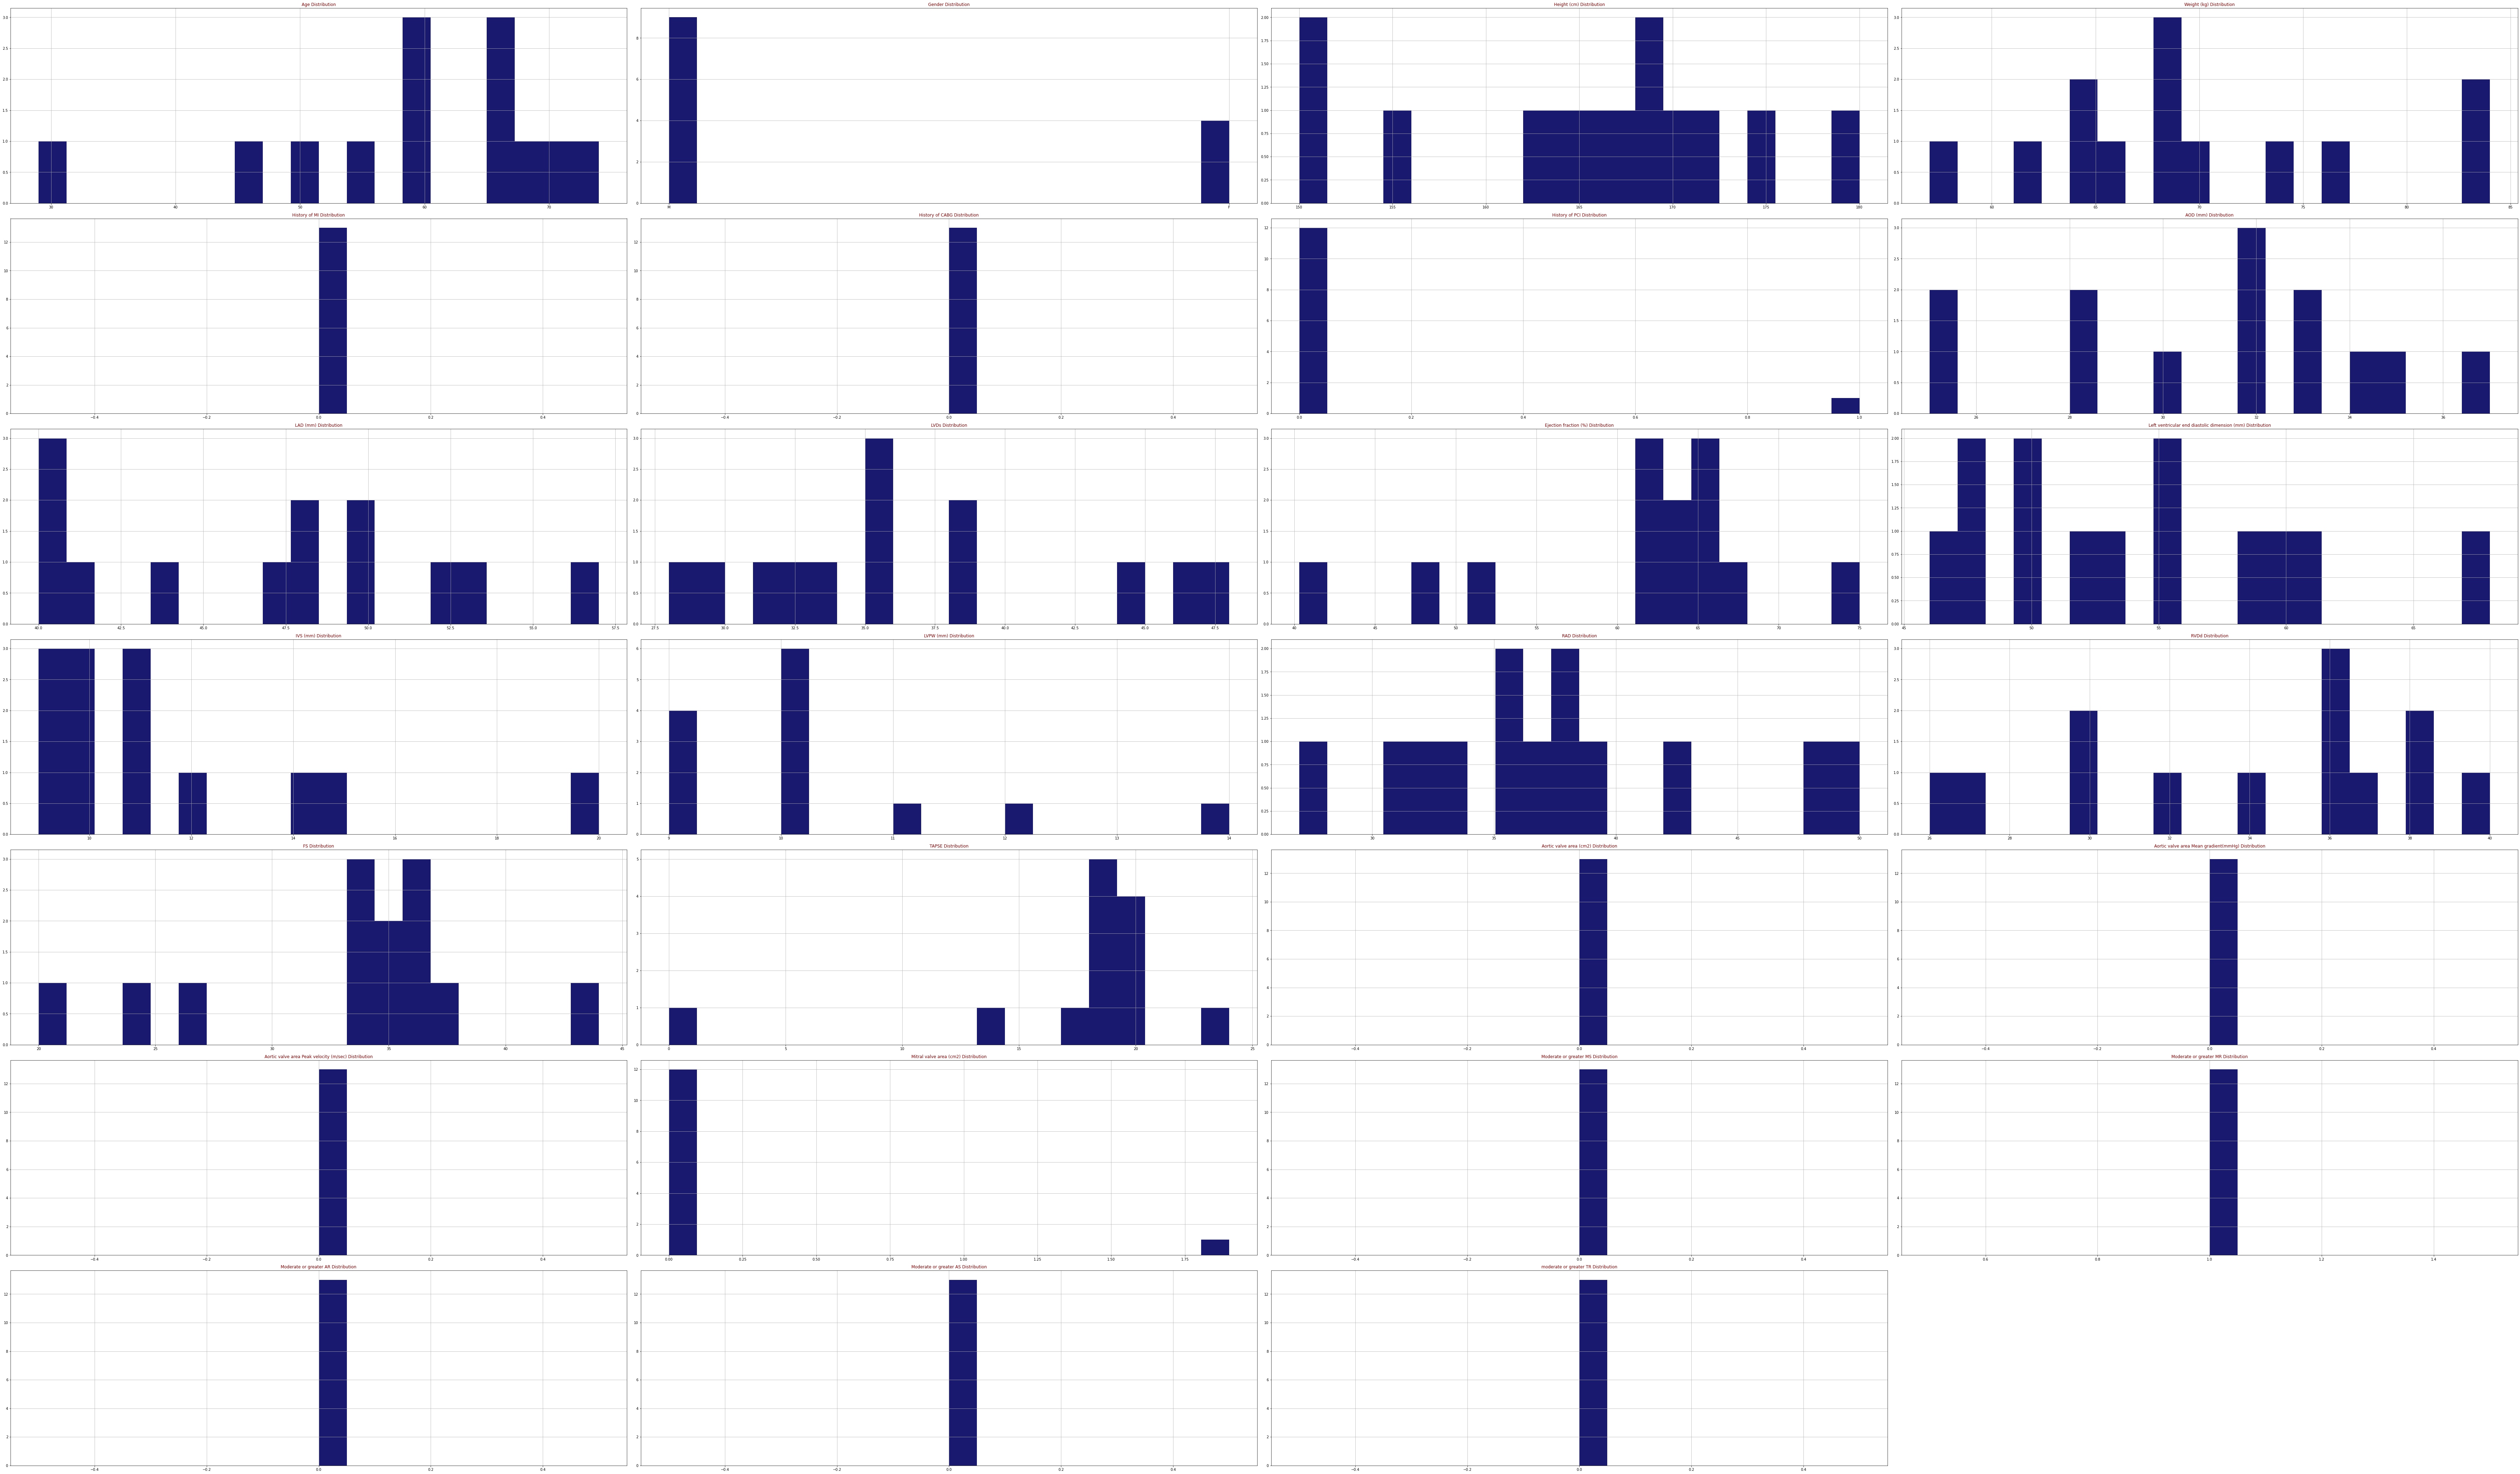

In [16]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(100,100))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(diseased_MR, diseased_MR.columns[4:], 12,4)

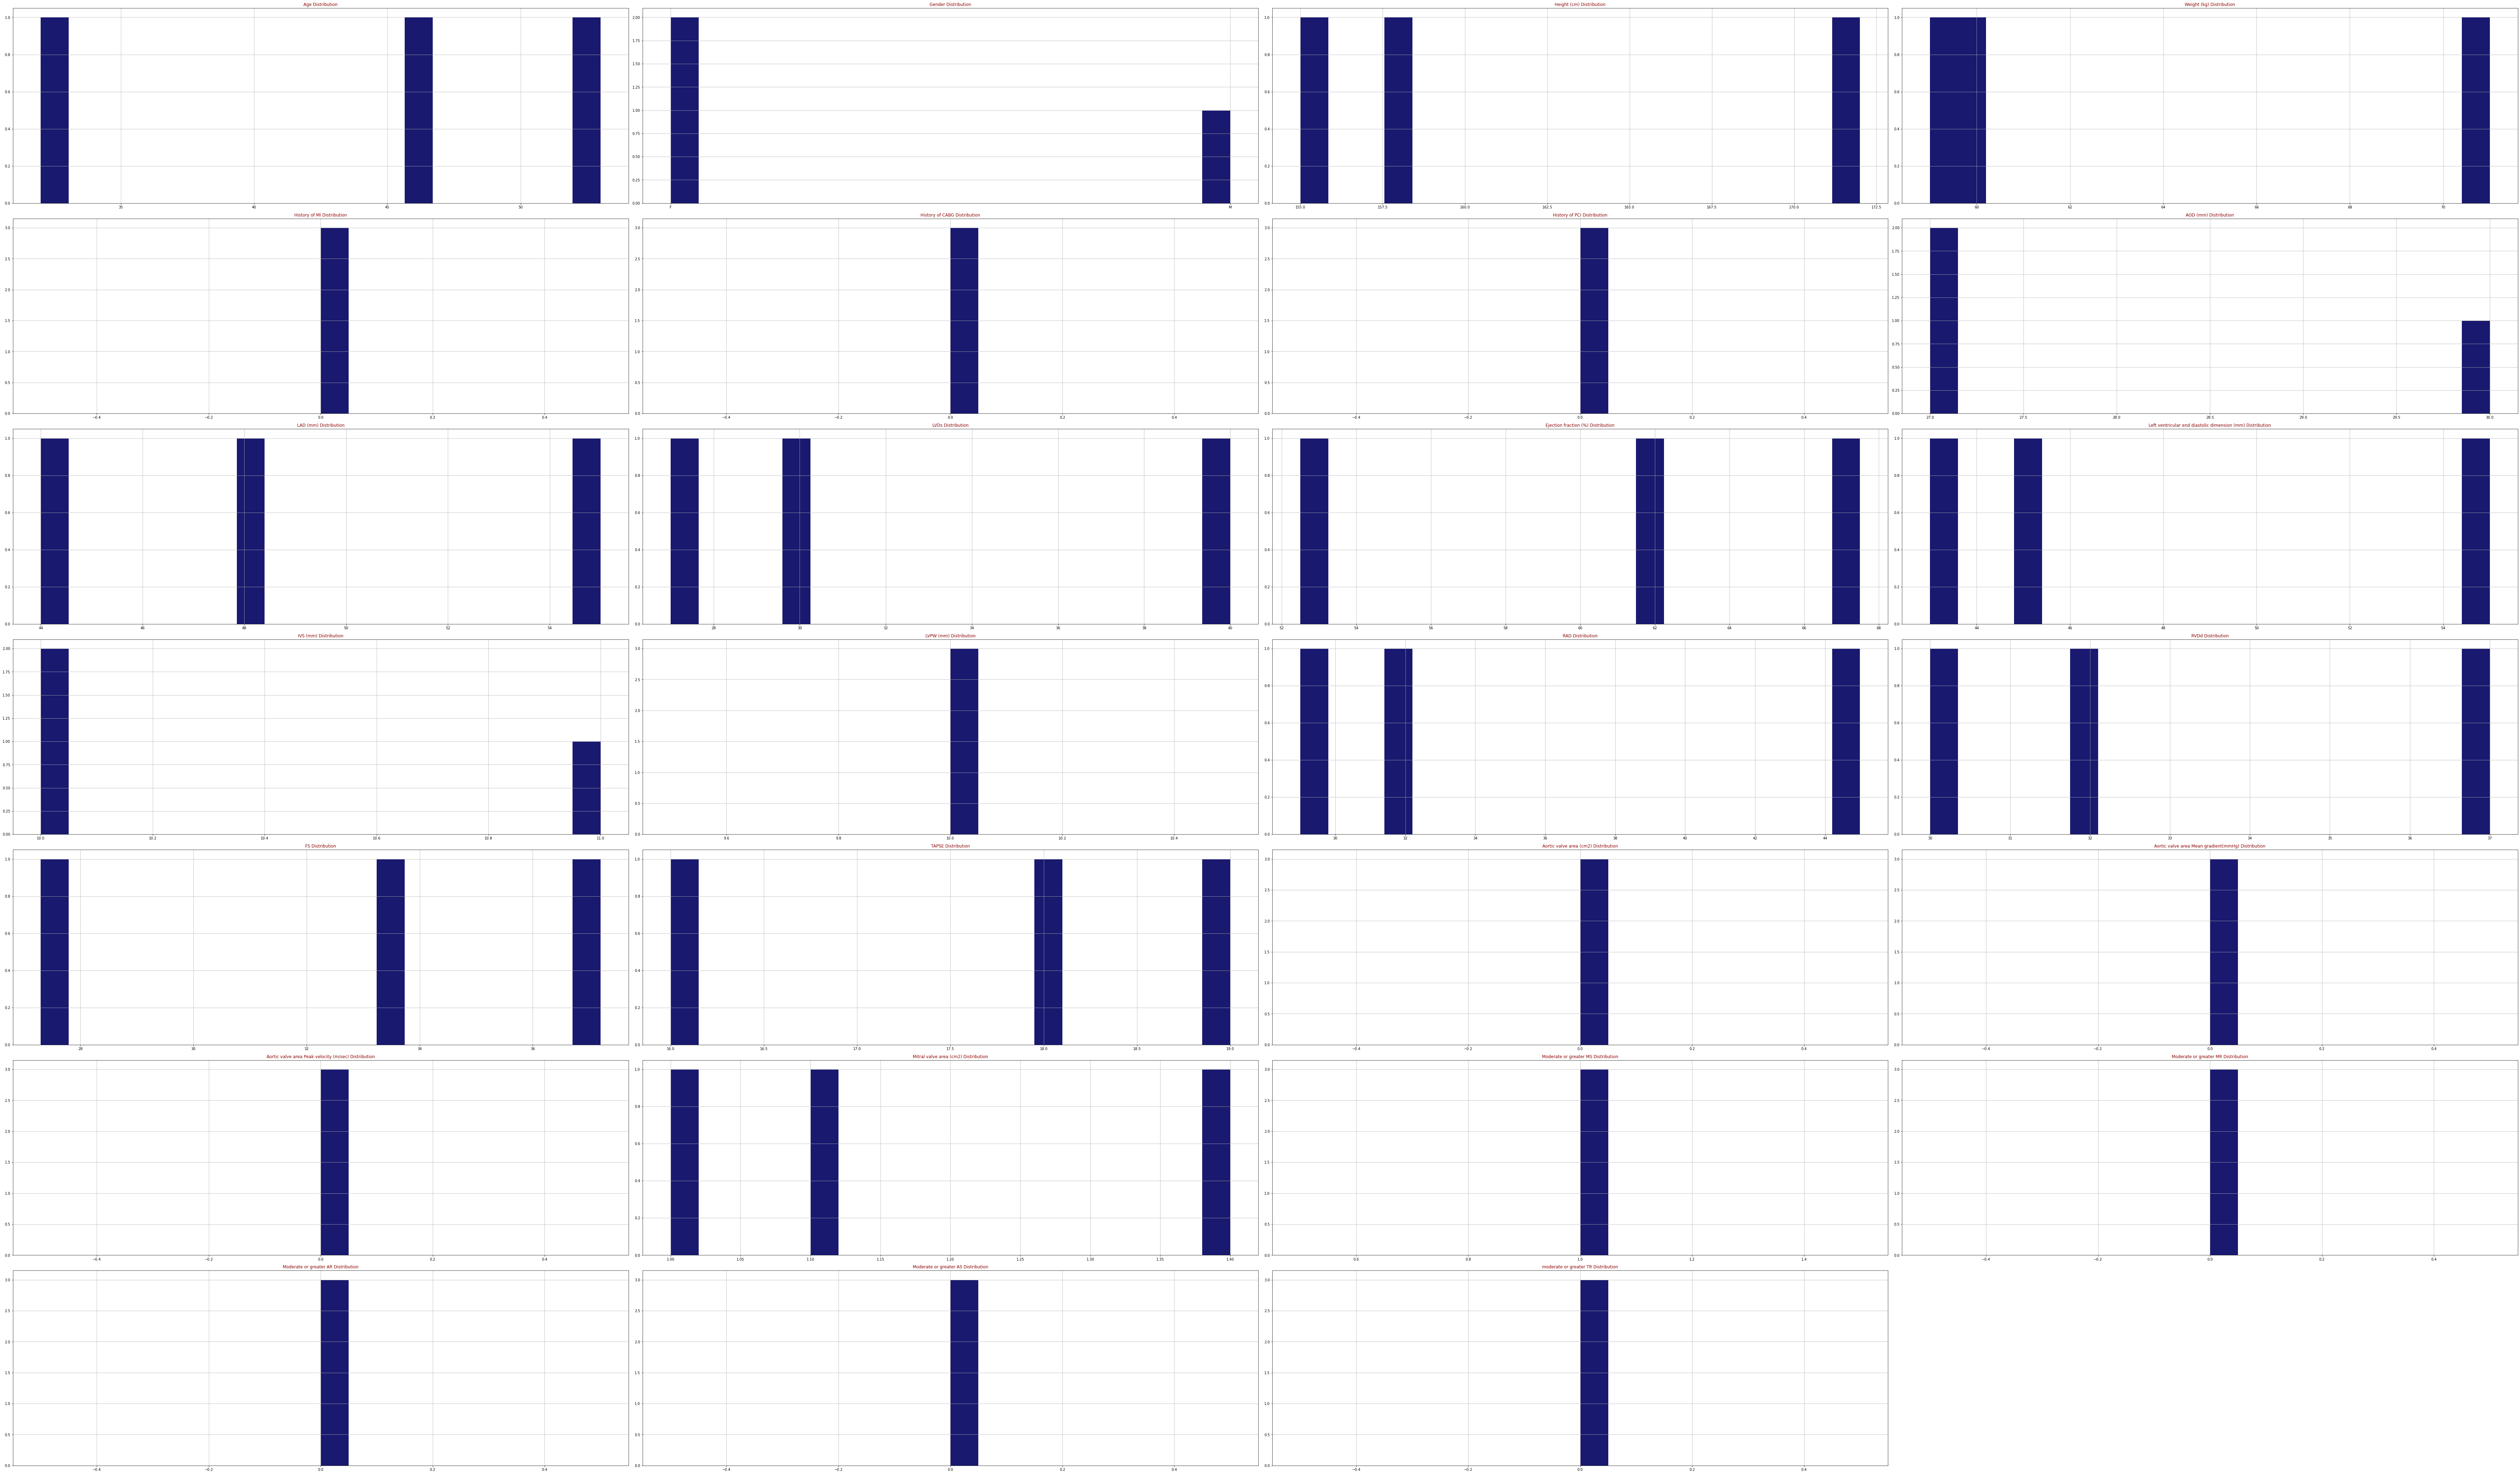

In [17]:
draw_histograms(diseased_MS, diseased_MS.columns[4:], 12,4)

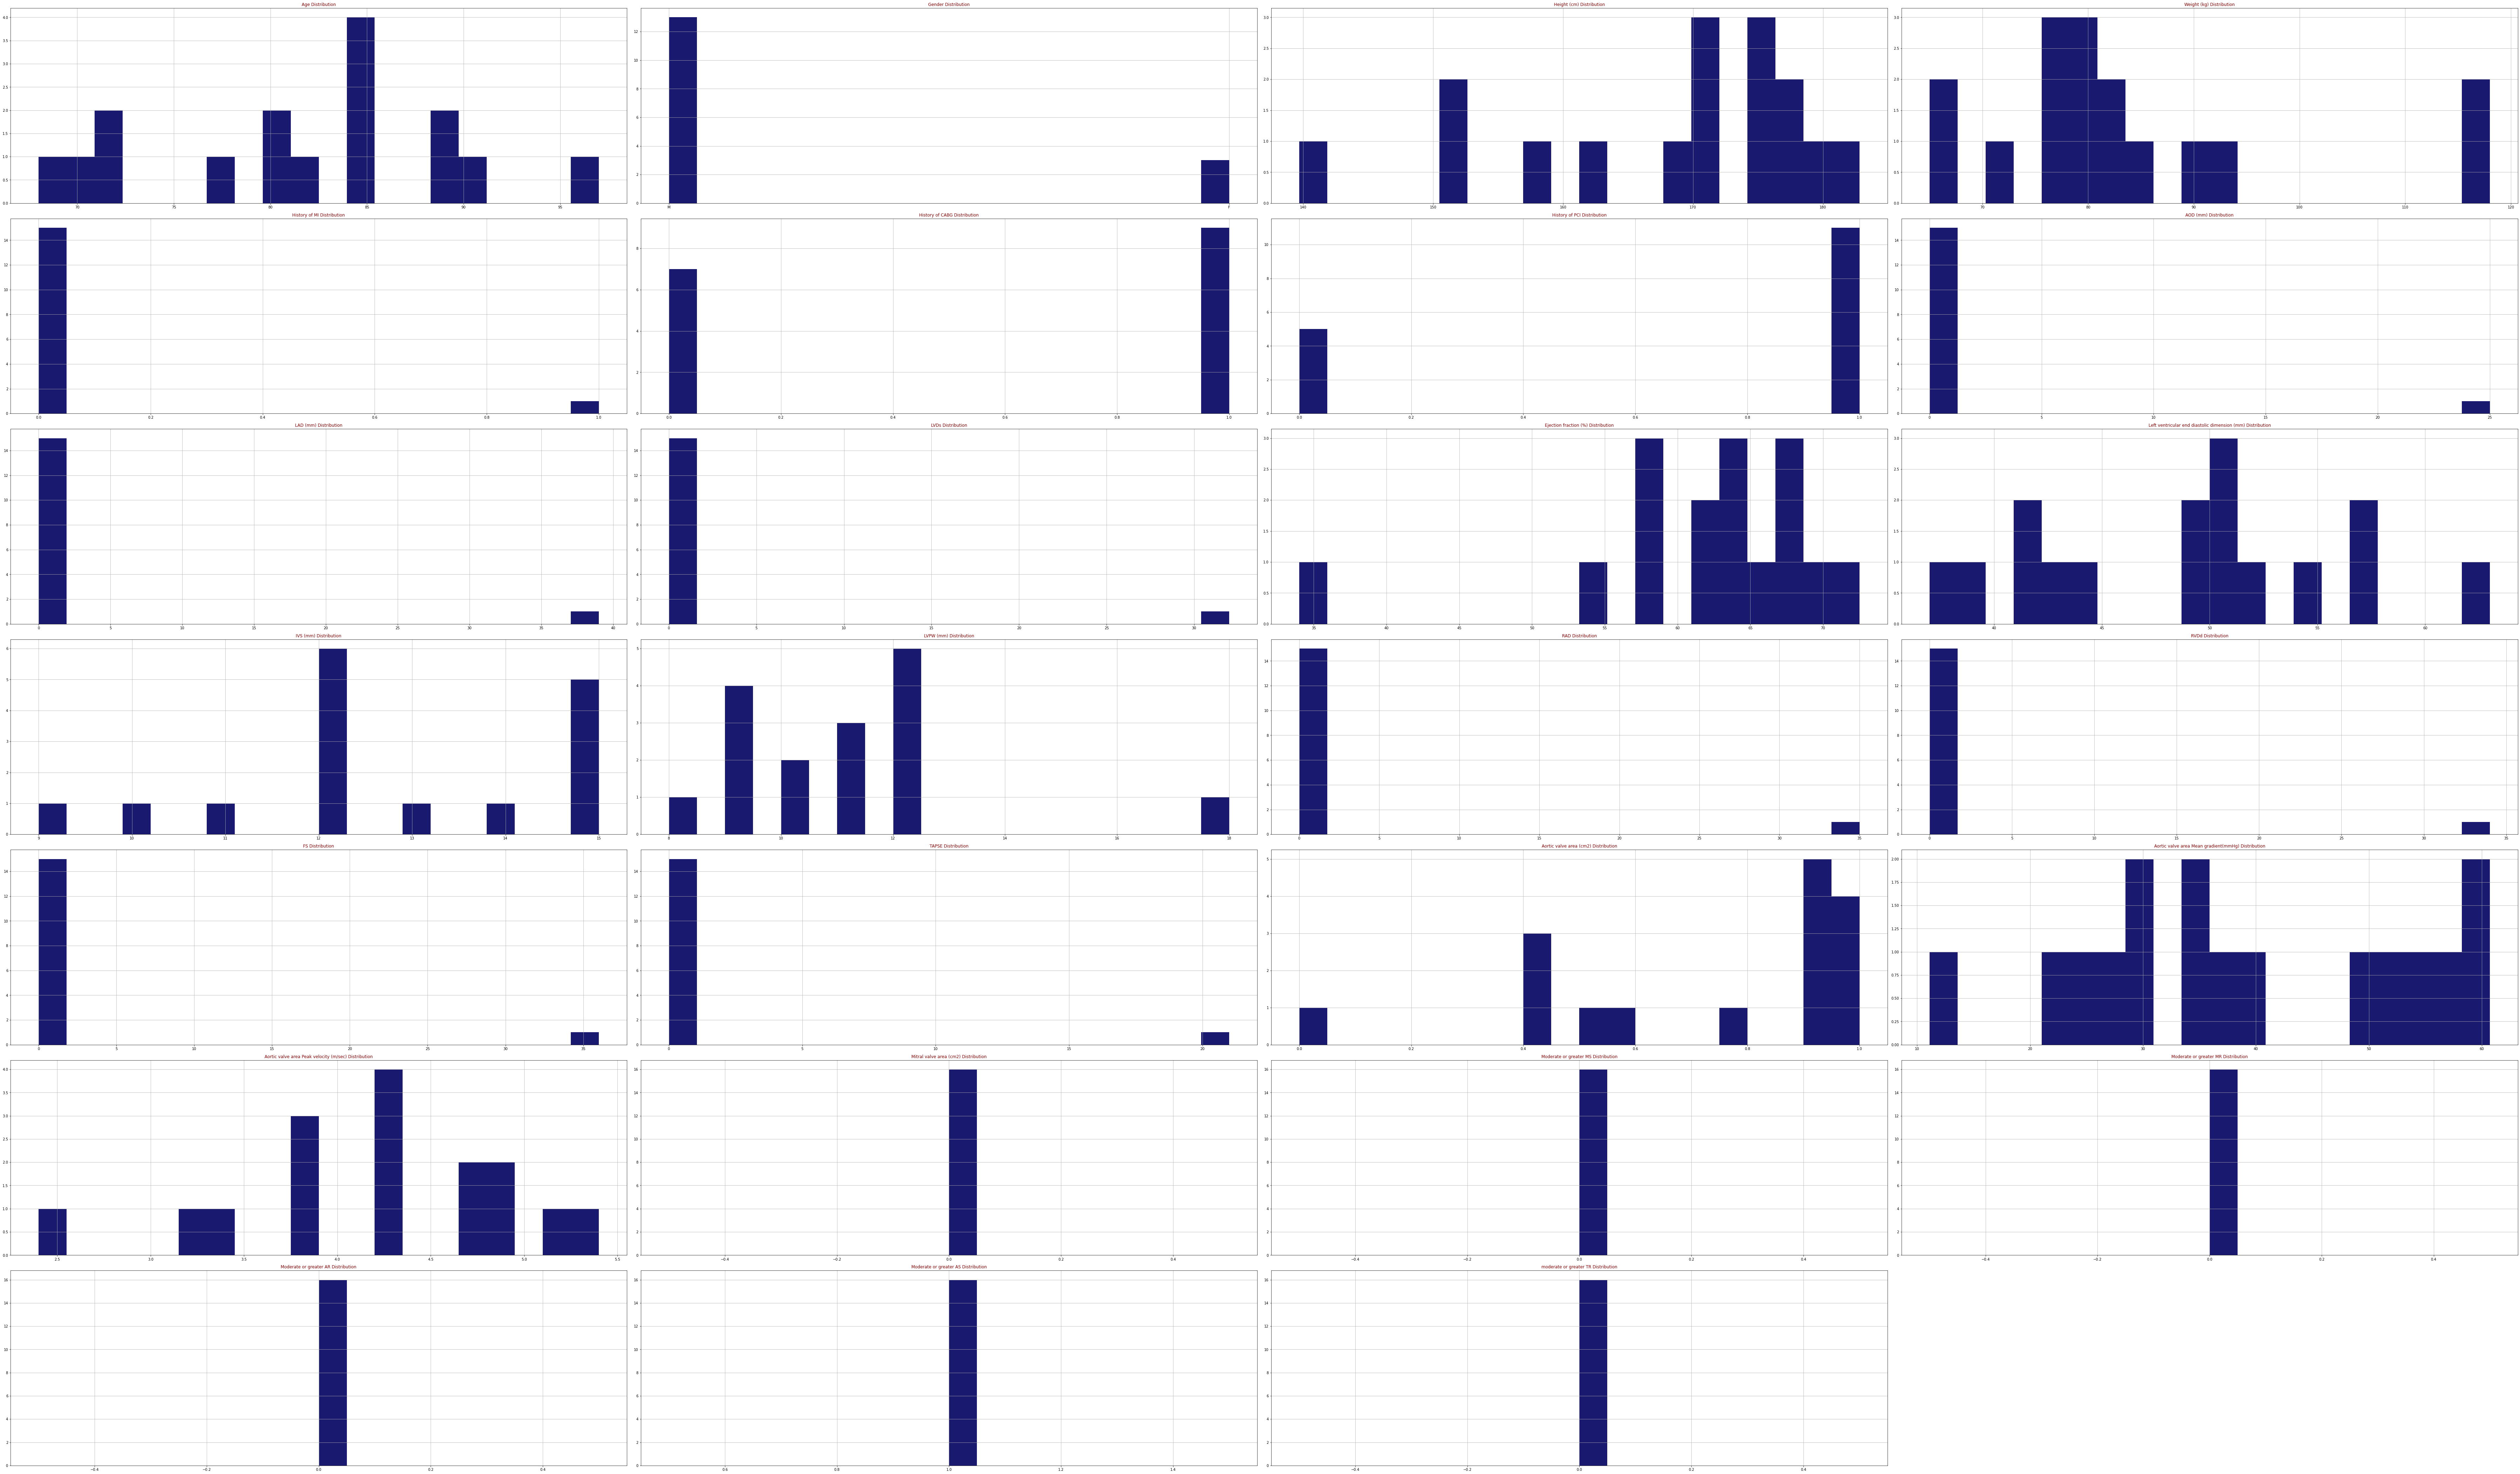

In [18]:
draw_histograms(diseased_AS, diseased_AS.columns[4:], 12,4)

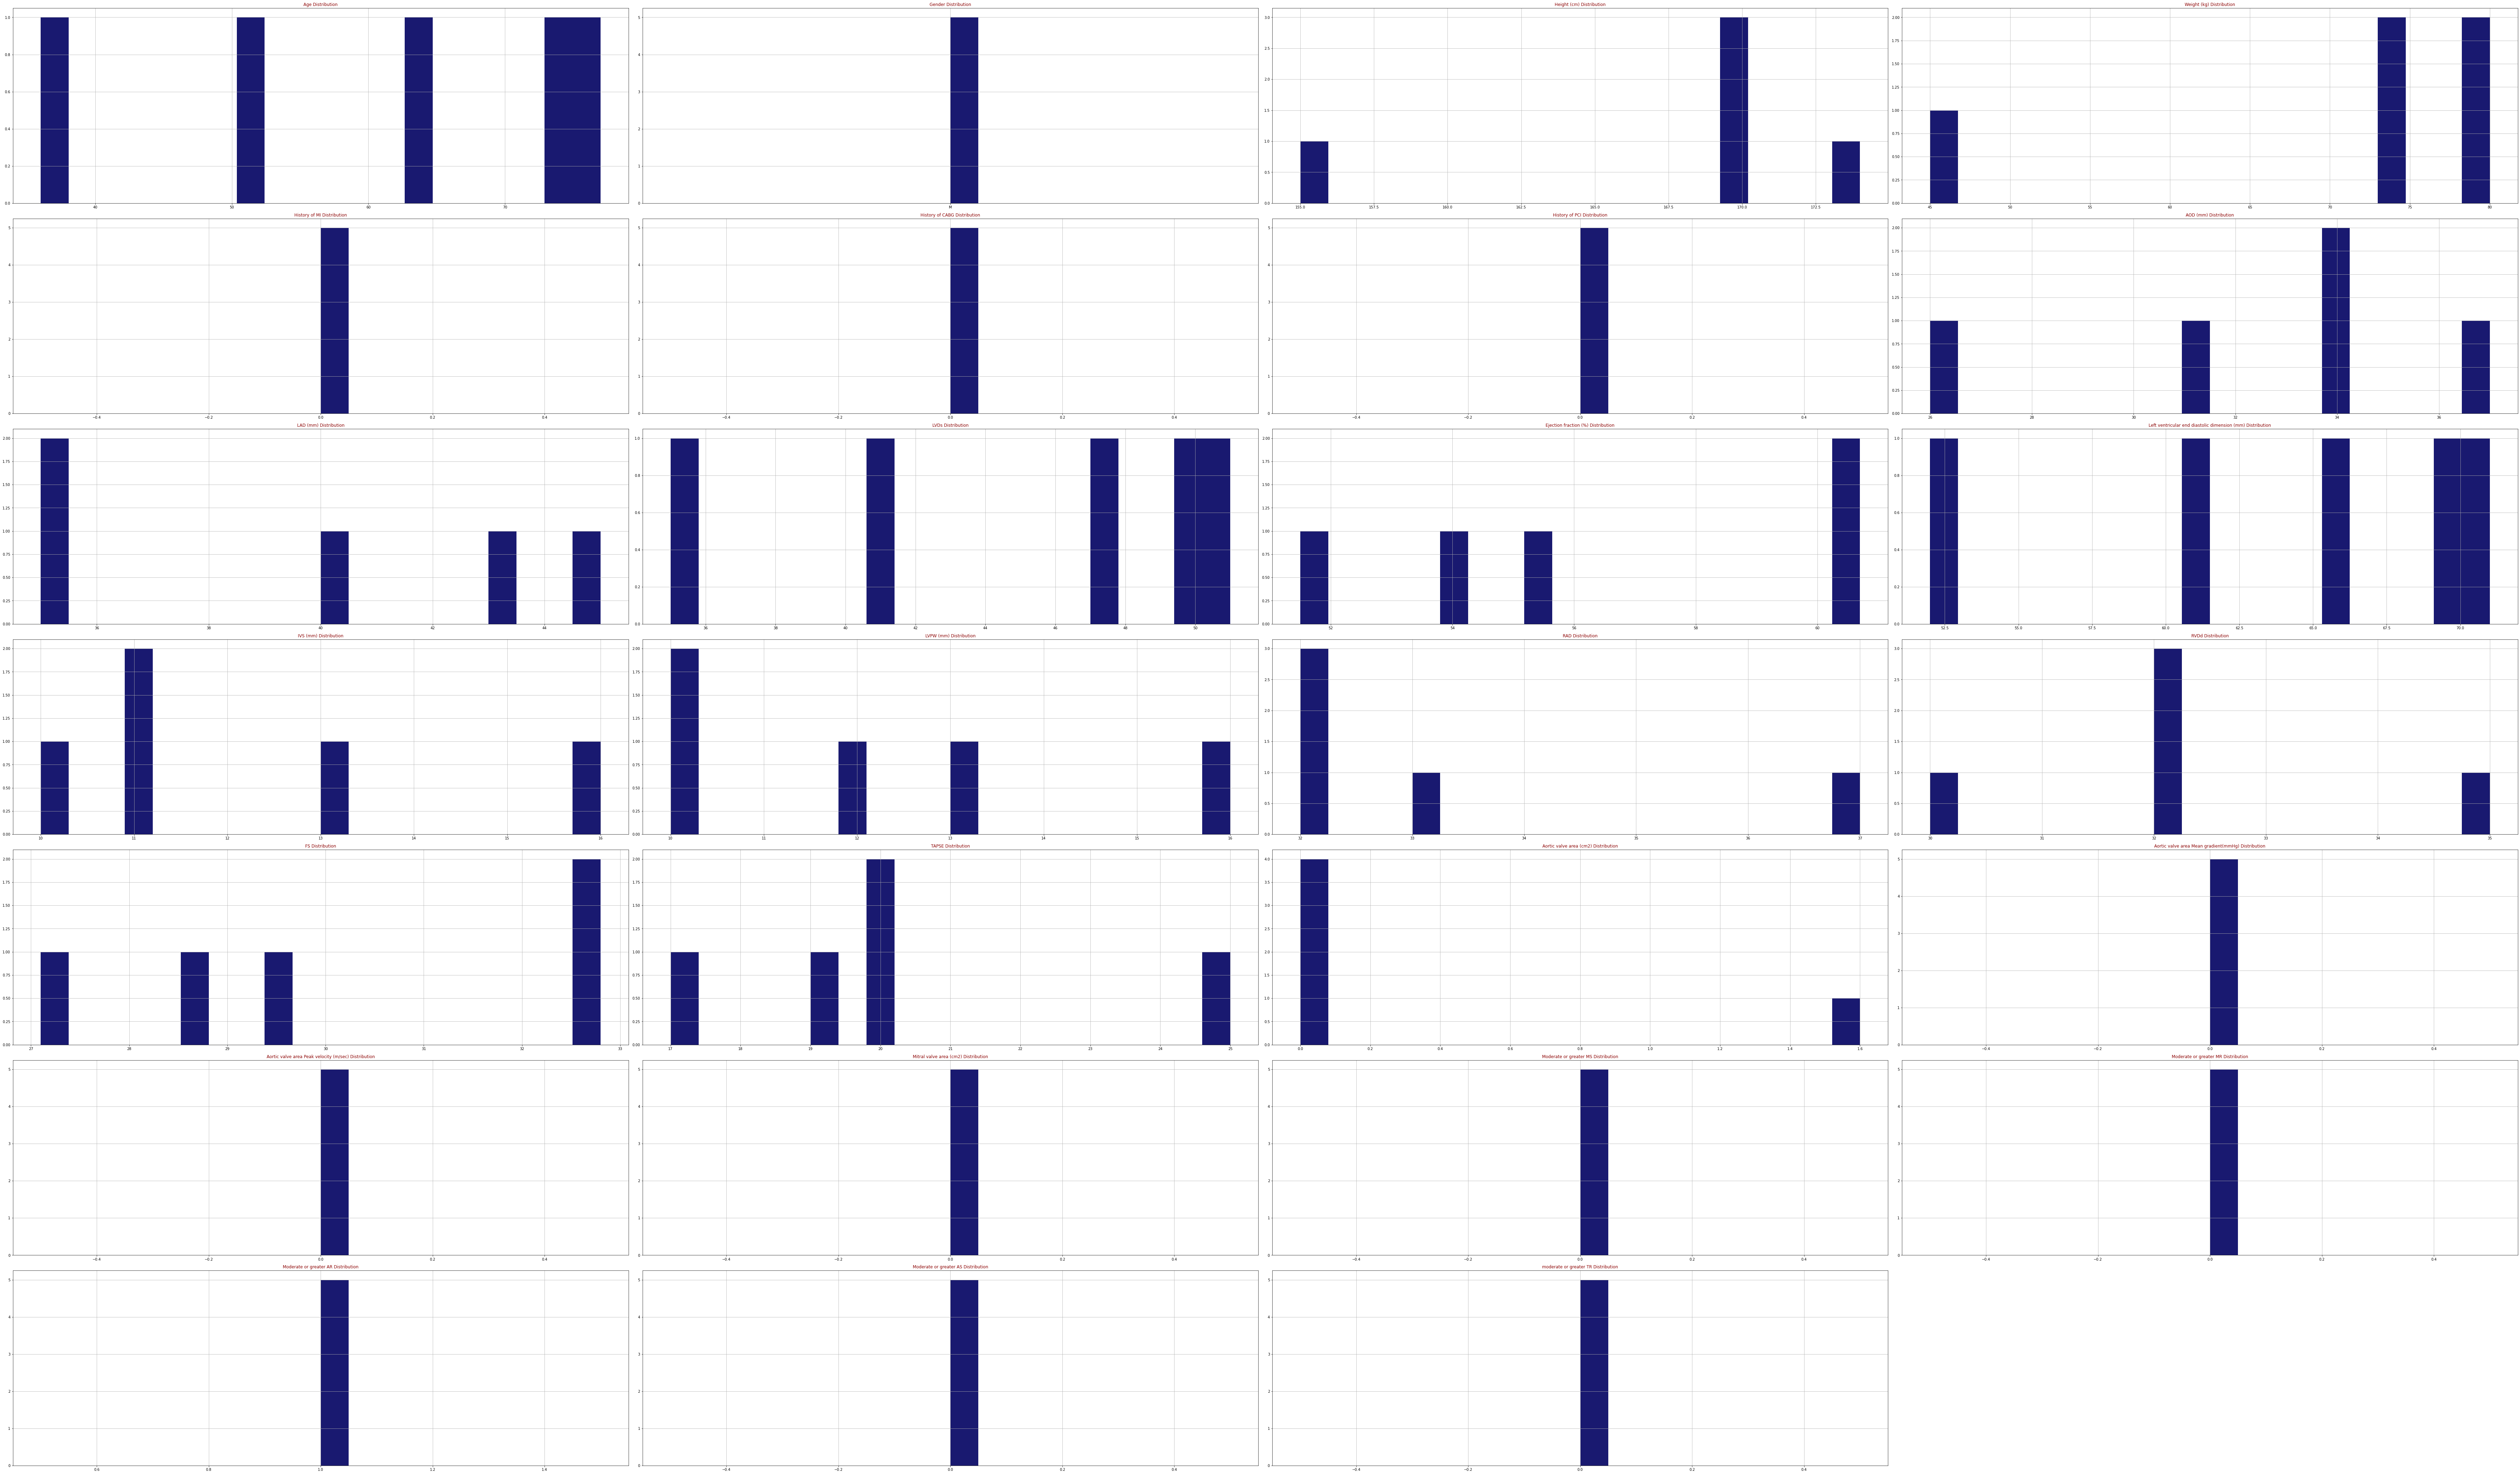

In [19]:
draw_histograms(diseased_AR, diseased_AR.columns[4:], 12,4)